In [1]:
import numpy as np
from scipy.stats import moyal
import matplotlib.pyplot as plt

In [2]:
def landau(x, amp):
    return amp*np.exp( -(x+np.exp(-x))/2. ) / np.sqrt(2*np.pi)

In [3]:
def expfunc(x, tau, amp):
    return amp*np.exp( -x/tau )

In [4]:
x = np.linspace(0, 400, 401) # 300 ns

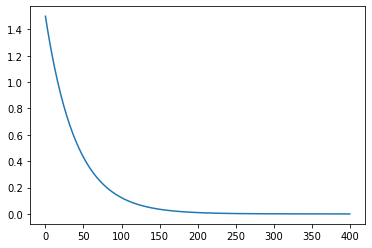

In [5]:
plt.plot(x, expfunc(x, 40, 1.5))
plt.show()

# Numerical integration

In [4]:
x25 = np.linspace(25, 400, 400//25)
print("x25:")
print(x25)
print("\n")

x833 = np.linspace(8.33, 400, int(400/8.33))
print("x833:")
print(x833)

x1 = np.linspace(1, 400, 400)
print("x1:")
print(x1)

x25:
[ 25.  50.  75. 100. 125. 150. 175. 200. 225. 250. 275. 300. 325. 350.
 375. 400.]


x833:
[  8.33        16.66340426  24.99680851  33.33021277  41.66361702
  49.99702128  58.33042553  66.66382979  74.99723404  83.3306383
  91.66404255  99.99744681 108.33085106 116.66425532 124.99765957
 133.33106383 141.66446809 149.99787234 158.3312766  166.66468085
 174.99808511 183.33148936 191.66489362 199.99829787 208.33170213
 216.66510638 224.99851064 233.33191489 241.66531915 249.9987234
 258.33212766 266.66553191 274.99893617 283.33234043 291.66574468
 299.99914894 308.33255319 316.66595745 324.9993617  333.33276596
 341.66617021 349.99957447 358.33297872 366.66638298 374.99978723
 383.33319149 391.66659574 400.        ]
x1:
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53

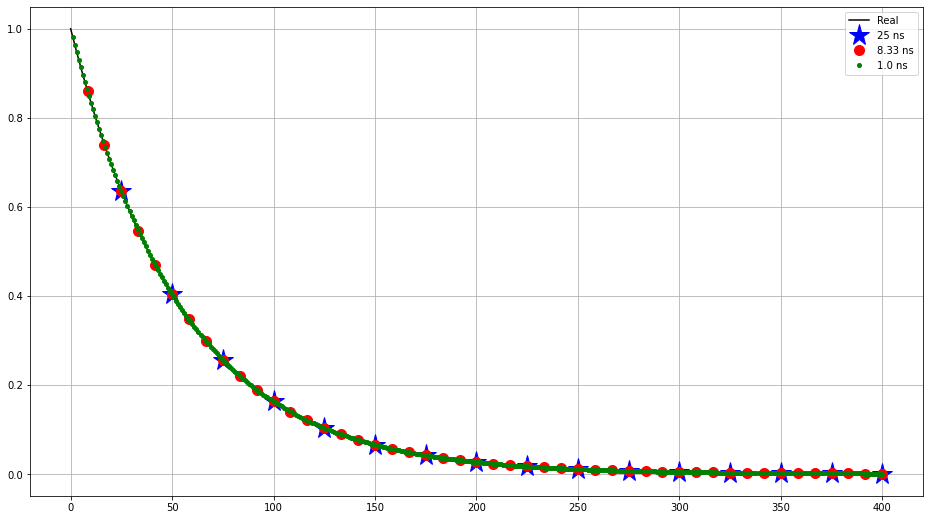

In [7]:
amp = 1.0
tau= 55.1 # ns

plt.figure(figsize=(16,9))

plt.plot(x, expfunc(x, tau, amp), 'k', label="Real")
plt.plot(x25, expfunc(x25, tau, amp), '*b', markersize=22, label="25 ns")
plt.plot(x833, expfunc(x833, tau, amp), 'or', markersize=10, label="8.33 ns")
plt.plot(x1, expfunc(x1, tau, amp), '.g', markersize=8, label="1.0 ns")

plt.legend()
plt.grid()

plt.show()

In [8]:
print("Real peak:")
print(1.0)

pk25 = expfunc(x25[0], tau, amp)
print("pk25:")
print(pk25)

print("\n")
pk833 = expfunc(x833[0], tau, amp)
print("pk833:")
print(pk833)

print("\n")
pk1 = expfunc(x1[0], tau, amp)
print("pk1:")
print(pk1)

Real peak:
1.0
pk25:
0.6352602584904417


pk833:
0.8596932208456184


pk1:
0.9820148777082751


In [9]:
print("Real sum:")
print(1.0*50)

print("\n")
sum25 = 0.

for i in x25:
    sum25 += expfunc(i, tau,  amp)
sum25 *= 25

print("sum25:")
print(sum25)

print("\n")

sum833 = 0.
for i in x833:
    sum833 += expfunc(i, tau, amp)
sum833 *= 8.33

print("sum833:")
print(sum833)

print("\n")

sum1 = 0.
for i in x1:
    sum1 += expfunc(i, tau, amp)
    
print("sum1:")
print(sum1)

Real sum:
50.0


sum25:
43.51139448483153


sum833:
50.98470244843543


sum1:
54.56310351157347


In [10]:
print("sum25/pk25")
print( sum25/pk25 )

print("\n")
print("sum833/pk833")
print( sum833/pk833 )

print("\n")
print("sum1/pk1")
print( sum1/pk1 )

sum25/pk25
68.49380848760622


sum833/pk833
59.30569325449076


sum1/pk1
55.562400071684465


In [11]:
print("(sum25/pk25) / (sum8.33/pk833):")
print( (sum25/pk25) / (sum833/pk833) )
print("\n")

print("(sum25/pk25) / (sum1/pk1):")
print( (sum25/pk25) / (sum1/pk1) )
print("\n")

print("(sum833/pk833) / (sum1/pk1):")
print( (sum833/pk833) / (sum1/pk1) )

print("\n")
print("3*(3.2/8.8)")
print(3*(3.2/8.8))

print("\n")
print("from Alvaro:", (200)/(50), (1425)/(180) )
print( 3*((200)/(50)) / ((1425)/(180)) )

(sum25/pk25) / (sum8.33/pk833):
1.154928047020506


(sum25/pk25) / (sum1/pk1):
1.2327366780275537


(sum833/pk833) / (sum1/pk1):
1.0673709770992046


3*(3.2/8.8)
1.0909090909090908


from Alvaro: 4.0 7.916666666666667
1.5157894736842106


In [12]:
print ((1- (1.09/1.15))*100)

5.217391304347807


In [13]:
print( 25/(1- np.exp(-8.33/50.)) )
print(1- np.exp(-25./50))

print( (1- np.exp(-8.33/50)) / (1- np.exp(-25/50)) )
print( 3*(1- np.exp(-8.33/50)) / (1- np.exp(-25/50)) )

162.9069468907633
0.3934693402873666
0.3900223610846057
1.1700670832538171


12330.752133707207 11184.962995474483


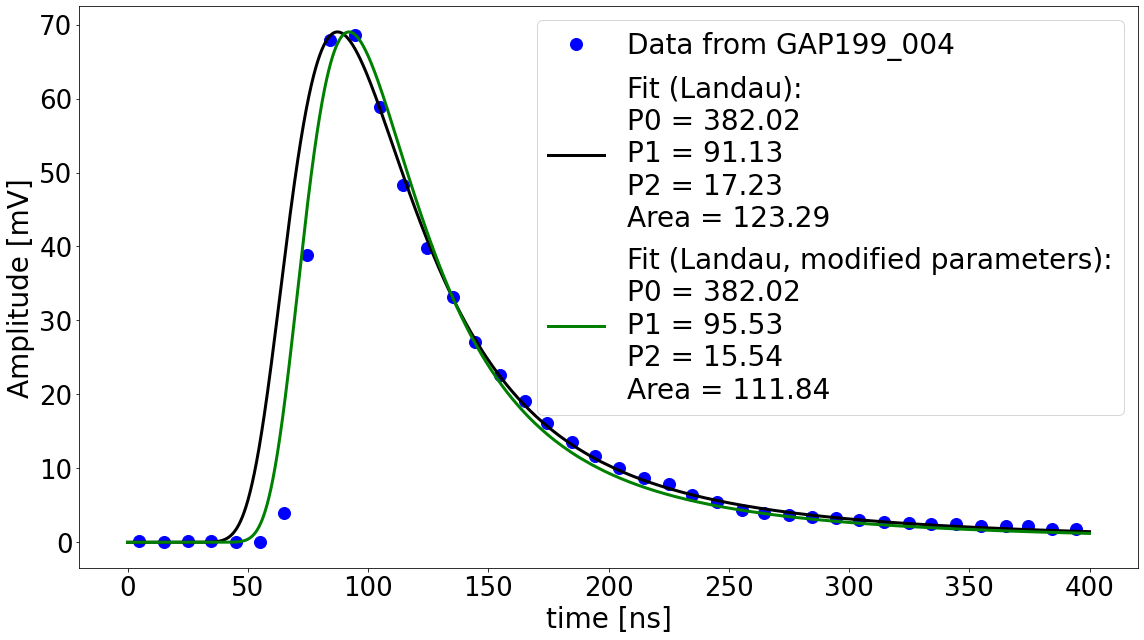

In [2]:
data = np.loadtxt("pulse_muon.dat", float)
dataFit0 = np.loadtxt("fittedPoints0.dat", float)
dataFit1 = np.loadtxt("fittedPoints1.dat", float)

xdata = data.T[0]
ydata = data.T[1]

xdatafit0 = dataFit0.T[0]
ydatafit0 = dataFit0.T[1]

xdatafit1 = dataFit1.T[0]
ydatafit1 = dataFit1.T[1]

print(np.sum(ydatafit0)/50., np.sum(ydatafit1)/50.)


plt.figure(figsize=(16,9))

plt.plot(xdata, ydata, 'ob', ms=12, label="Data from GAP199_004")
plt.plot(xdatafit0, ydatafit0, '-k', lw=3, label="Fit (Landau):\nP0 = 382.02\nP1 = 91.13\nP2 = 17.23\nArea = 123.29")
plt.plot(xdatafit1, ydatafit1, '-g', lw=3, label="Fit (Landau, modified parameters):\nP0 = 382.02\nP1 = 95.53\nP2 = 15.54\nArea = 111.84")

plt.legend(fontsize=28)
plt.ylabel("Amplitude [mV]", fontsize=28)
plt.yticks(fontsize=26)
plt.xlabel("time [ns]", fontsize=28)
plt.xticks(fontsize=26)

plt.tight_layout()
plt.savefig("../plots/originalPulseGapNote199-004.png", dpi=100)
plt.show()

## Sampling the pulse

In [5]:
y25 = []
y833 = []

for i in x25[:-1]:
    x = np.where(xdatafit1 == i)
    y25.append( ydatafit1[x[0][0]] )

for i in x833[:-1]:
    x = np.where(xdatafit1 == int(i*100)/100)
    y833.append( ydatafit1[x[0][0]] )

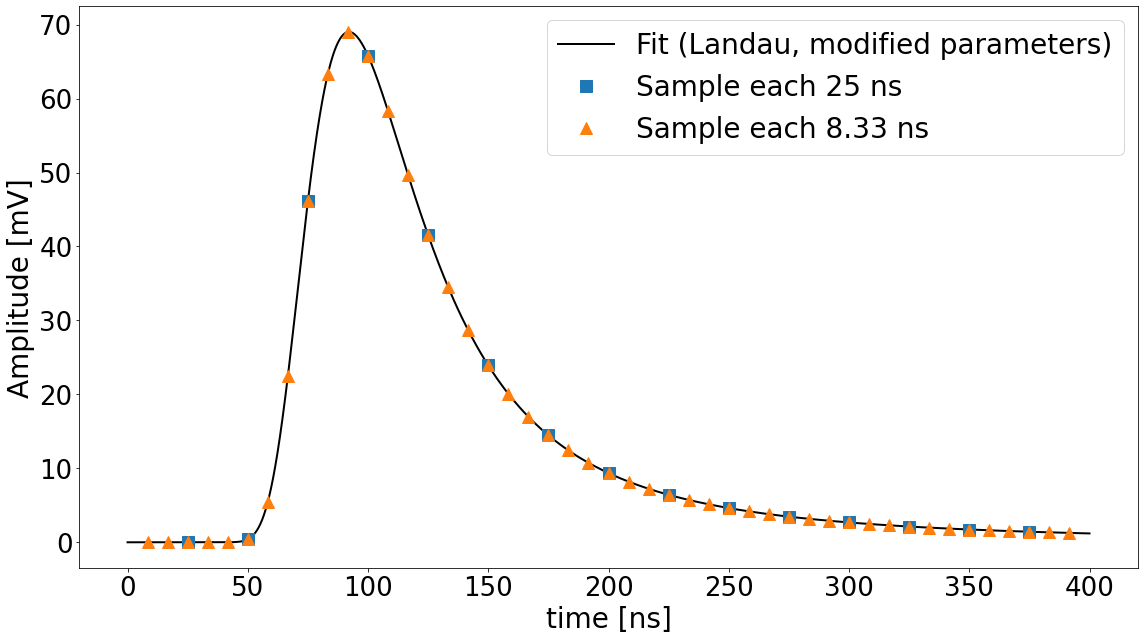

In [6]:
mean = 91.13
sigma = 17.23

plt.figure(figsize=(16,9))

plt.plot(xdatafit1, ydatafit1, '-k', lw=2, label="Fit (Landau, modified parameters)")
plt.plot(x25[:-1], y25, 's', ms=12, label="Sample each 25 ns")
plt.plot(x833[:-1], y833, '^', ms=12, label="Sample each 8.33 ns")

plt.legend(fontsize=28)
plt.ylabel("Amplitude [mV]", fontsize=28)
plt.yticks(fontsize=26)
plt.xlabel("time [ns]", fontsize=28)
plt.xticks(fontsize=26)

plt.tight_layout()
plt.savefig("../plots/samplingPulseGapNote199-004.png", dpi=100)
plt.show()

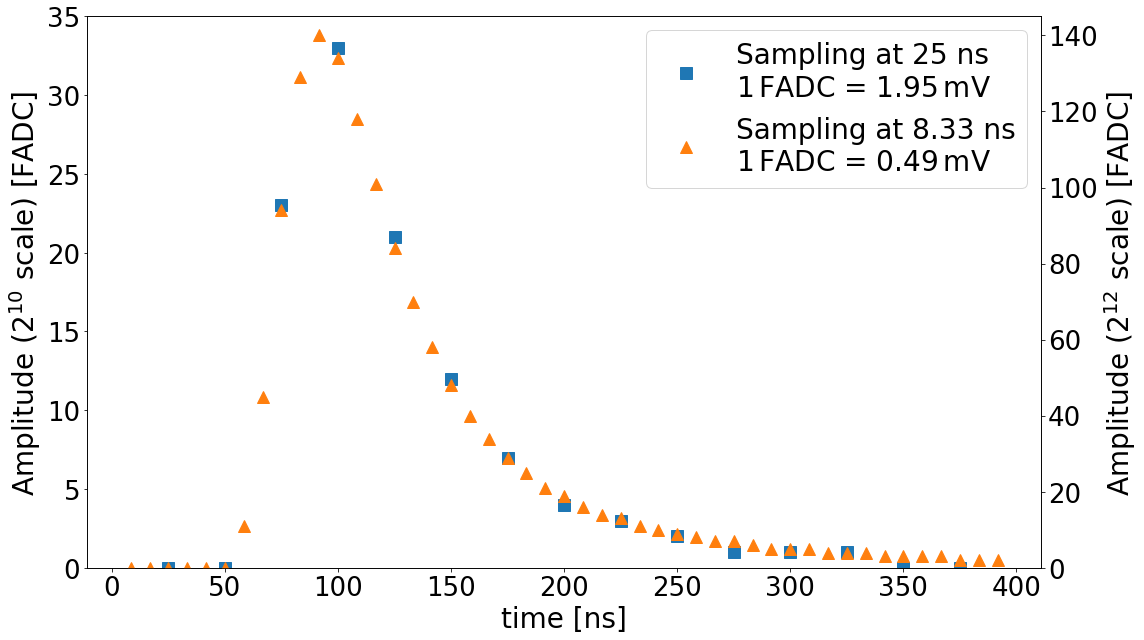

In [7]:
ydigi210 = []
ydigi212 = []

mv2fadc210 = 1.95 #mV
mv2fadc212 = 0.49 #mV

for i in x25[:-1]:
    x = np.where(xdatafit1 == i)
    ydigi210.append( int(ydatafit1[x[0][0]]/mv2fadc210) )

for i in x833[:-1]:
    x = np.where(xdatafit1 == int(i*100)/100)
    ydigi212.append( int(ydatafit1[x[0][0]]/mv2fadc212) )

mean = 91.13
sigma = 17.23

fig, ax = plt.subplots(figsize=(16,9))
ax1 = ax.twinx()

plot25 = ax.plot(x25[:-1], ydigi210, 's', ms=12, color='tab:blue', label="Sampling at 25 ns\n$1$$\,$FADC = $1.95\,$mV")
ax.set_ylabel("Amplitude ($2^{10}$ scale) [FADC]", fontsize=28)
ax.tick_params(axis='y', labelsize=26)
ax.set_ylim(0, 35)
ax.set_xlabel("time [ns]", fontsize=28)
ax.tick_params(axis='x', labelsize=26)

plot833 = ax1.plot(x833[:-1], ydigi212, '^', ms=12, color='tab:orange', label="Sampling at 8.33 ns\n$1$$\,$FADC = $0.49\,$mV")
ax1.set_ylabel("Amplitude ($2^{12}$ scale) [FADC]", fontsize=28)
ax1.tick_params(axis='y', labelsize=26)
ax1.set_ylim(0, 145)
ax1.set_xlabel("time [ns]", fontsize=28)
ax1.tick_params(axis='x', labelsize=26)

two = plot25 + plot833
labs = [l.get_label() for l in two]
ax.legend(two, labs, fontsize=28)


plt.tight_layout()
plt.savefig("../plots/samplingDigiPulseGapNote199-004.png", dpi=100)
plt.show()

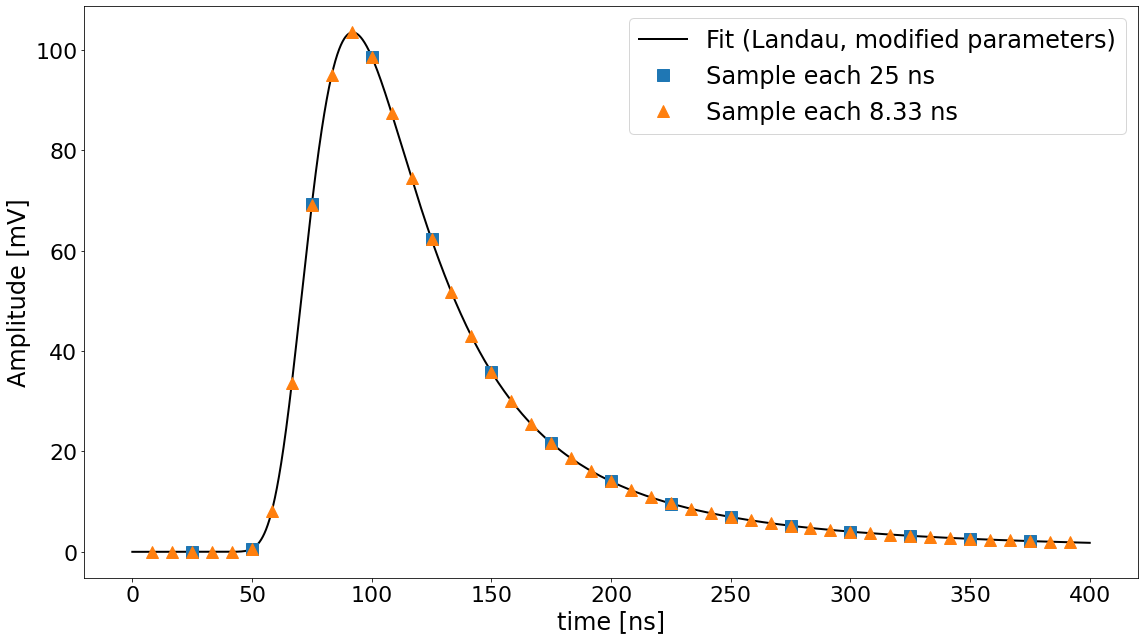

In [8]:
mean = 91.13
sigma = 17.23

y25 = []
y833 = []

for i in x25[:-1]:
    x = np.where(xdatafit1 == i)
    y25.append( 1.5*ydatafit1[x[0][0]] )

for i in x833[:-1]:
    x = np.where(xdatafit1 == int(i*100)/100)
    y833.append( 1.5*ydatafit1[x[0][0]] )


plt.figure(figsize=(16,9))

plt.plot(xdatafit1, 1.5*ydatafit1, '-k', lw=2, label="Fit (Landau, modified parameters)")
plt.plot(x25[:-1], y25, 's', ms=12, label="Sample each 25 ns")
plt.plot(x833[:-1], y833, '^', ms=12, label="Sample each 8.33 ns")

plt.legend(fontsize=24)
plt.ylabel("Amplitude [mV]", fontsize=24)
plt.yticks(fontsize=22)
plt.xlabel("time [ns]", fontsize=24)
plt.xticks(fontsize=22)

plt.tight_layout()
#plt.savefig("../plots/samplingPulseGapNote199-004.png", dpi=100)
plt.show()

In [9]:
def searchPk(x, y):
    tmp = 0
    pk = 0
    for i in range(len(x)):
        tmp = y[i]
        if tmp > pk:
            pk = tmp
    return pk

def getArea(x, y):
    summ = 0
    for i in range(len(x)):
        summ += y[i]
    return summ

In [30]:
print("For original pulse:")
print("Peak:", np.max(ydatafit1))
print("Charge:",np.sum(ydatafit1)*((400./ydatafit1.size)/50.))

print("\n")
print("For 25.0 ns and 1024:")
factorCh25 = 25./50.
pk25 = mv2fadc210*searchPk(x25[:-1], ydigi210)
sum25 = (factorCh25*mv2fadc210)*getArea(x25[:-1], ydigi210)
print("Peak:", pk25, "mV")
print("Charge:", sum25, "pC")

print("\n")
print("For 8.33 ns and 4096:")
factorCh833 = 8.33/50.
pk833 = mv2fadc212*searchPk(x833[:-1], ydigi212)
sum833 = (factorCh833*mv2fadc212)*getArea(x833[:-1], ydigi212)
print("Peak:", pk833, "mV")
print("Charge:", sum833, "pC")

print("\n")
print("AoP:")
print("AoP, 25.0 ns:", sum25/pk25)
print("AoP, 8.33 ns:",  sum833/pk833)
print("AoP Ratio:", (sum25/pk25)/(sum833/pk833))

For original pulse:
Peak: 69.0135
Charge: 111.84683378390024


For 25.0 ns and 1024:
Peak: 64.35 mV
Charge: 105.3 pC


For 8.33 ns and 4096:
Peak: 68.6 mV
Charge: 109.879364 pC


AoP:
AoP, 25.0 ns: 1.6363636363636365
AoP, 8.33 ns: 1.6017400000000002
AoP Ratio: 1.0216162650390428


In [49]:
print("Real sum:")
sum1 = 1.*getArea(x1[:-1])
sum1 /= 50.
print(sum1, "pC")

print("\n")

sum25 /= 50.

print("sum25:")
print(sum25, "pC")

print("\n")

sum833 = 8.33*getArea(x833[:-1])
sum833 /= 50.

print("sum833:")
print(sum833, "pC")

Real sum:
6.108302033062698e-56 pC


sum25:
1.7966119975771439e-56 pC


sum833:
4.134416007927329e-56 pC


In [50]:
print("sum1/pk1")
print( sum1/pk1 )

print("\n")
print("sum25/pk25")
print( sum25/pk25 )

print("\n")
print("sum833/pk833")
print( sum833/pk833 )

sum1/pk1
0.24257872231759633


sum25/pk25
0.562978885323397


sum833/pk833
0.3257138361611018


In [51]:
print("(sum25/pk25) / (sum8.33/pk833):")
print( (sum25/pk25) / (sum833/pk833) )
print("\n")

print("(sum25/pk25) / (sum1/pk1):")
print( (sum25/pk25) / (sum1/pk1) )
print("\n")

print("(sum833/pk833) / (sum1/pk1):")
print( (sum833/pk833) / (sum1/pk1) )

print("\n")
print("3*(3.2/8.8)")
print(3*(3.2/8.8))

print("\n")
print("from Alvaro:", (200)/(50), (1425)/(180) )
print( 3*((200)/(50)) / ((1425)/(180)) )

(sum25/pk25) / (sum8.33/pk833):
1.7284463317822987


(sum25/pk25) / (sum1/pk1):
2.3208090138520747


(sum833/pk833) / (sum1/pk1):
1.3427139571403164


3*(3.2/8.8)
1.0909090909090908


from Alvaro: 4.0 7.916666666666667
1.5157894736842106


# Simulating pulses
## Using Root-Fit modifired parameters

In [2]:
pulses = np.loadtxt("rmdpulses.dat")

xtime = pulses.T[0]
yampl = pulses.T[1]

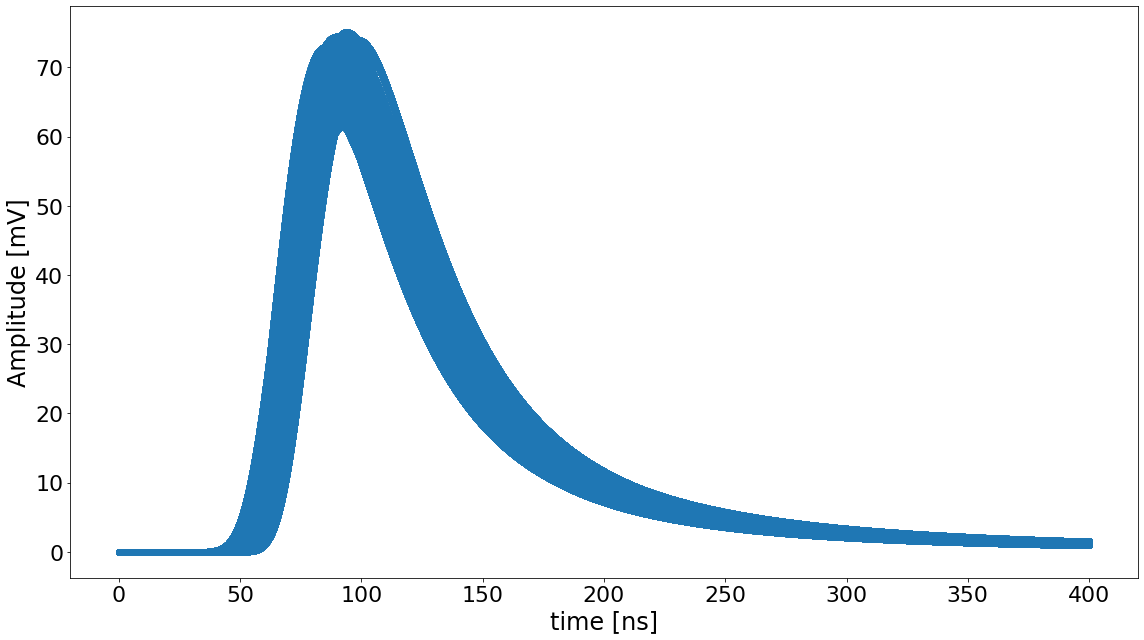

In [4]:
plt.figure(figsize=(16,9))

plt.plot(xtime, yampl, 'o')

plt.ylabel("Amplitude [mV]", fontsize=24)
plt.yticks(fontsize=22)
plt.xlabel("time [ns]", fontsize=24)
plt.xticks(fontsize=22)

plt.tight_layout()
plt.savefig("../plots/artifitialPulses.png", dpi=100)
plt.show()

In [3]:
x25 = np.linspace(25, 400, int(400/25))
x833 = np.linspace(8.33, 400, int(400/8.33))
x1 = np.linspace(1, 400, 400)

In [5]:
sglpulse210 = []
sglpulse212 = []
mv2fadc210 = 1.95 #mV
mv2fadc212 = 0.49 #mV

bintime = np.linspace(0, 10, 0.01)
print(bintime)

tmpbin25 = 0.
for np in range( int(yampl.size/4e2) ):
    tmp = []
    tmpcnt = np*400
    tmpbin25 = 25.
    for t in range(400):
        if t == tmpbin25:
            tmp.append( int(yampl[t+tmpcnt]/mv2fadc210) )
            tmpbin25 += 25.
    sglpulse210.append( tmp )
    
tmpbin833 = 0.
for np in range( int(yampl.size/4e2) ):
    tmp = []
    tmpcnt = np*400
    tmpbin833 = 8.33
    for t in range(400):
        if 10.*t == tmpbin833:
            tmp.append( int(yampl[t+tmpcnt]/mv2fadc212) )
            tmpbin833 += 8.33
    sglpulse212.append( tmp )

AttributeError: 'int' object has no attribute 'linspace'

In [6]:
def searchPk(x, y):
    tmp = 0
    pk = 0
    for i in range(len(x)):
        tmp = y[i]
        if tmp > pk:
            pk = tmp
    return pk

def getArea(x, y):
    summ = 0
    for i in range(len(x)):
        summ += y[i]
    return summ

print(sglpulse210[2])

[]


In [11]:
import numpy as np
pkhist25 = np.zeros(200, int)
pkhist833 = np.zeros(200, int)

chhist25 = np.zeros(500, int)
chhist833 = np.zeros(500, int)

factorCh25 = 25./50.
factorCh833 = 8.33/50.

for i in range(len(sglpulse210)):
    pkhist25[ int(searchPk(x25, sglpulse210[i])) ] += 1
    chhist25[ int(getArea(x25, sglpulse210[i])*factorCh25) ] += 1

for i in range(len(sglpulse212)):
    pkhist833[ int(searchPk(x833, sglpulse212[i])) ] += 1
    chhist833[ int(getArea(x833, sglpulse212[i])*factorCh833) ] += 1

IndexError: list index out of range

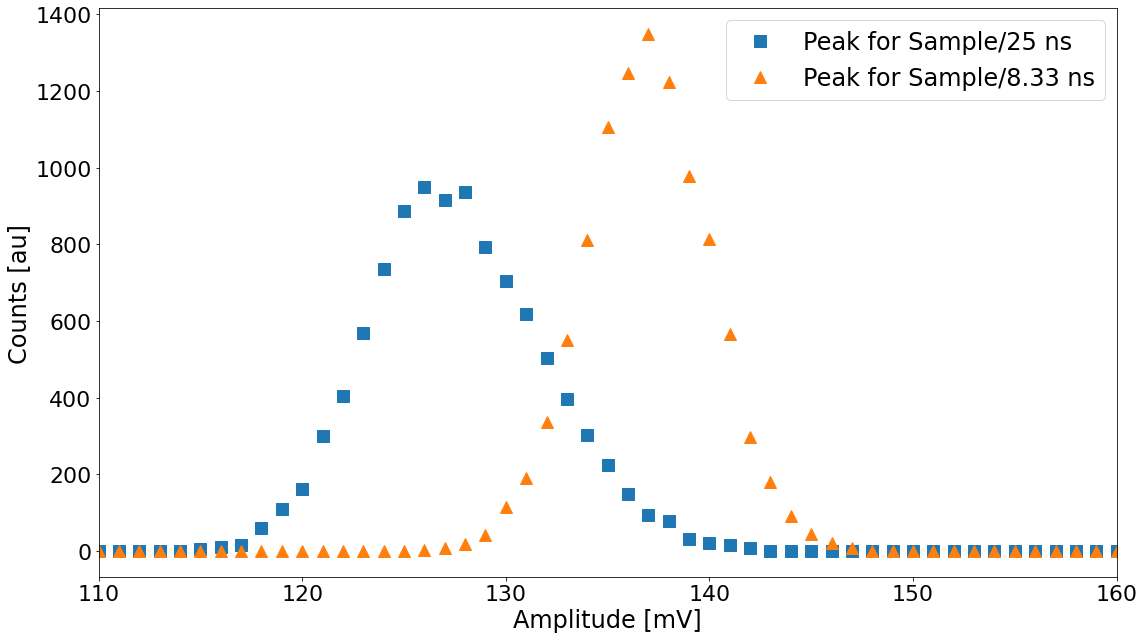

In [18]:
plt.figure(figsize=(16,9))

plt.plot(pkhist25, 's', ms=12, label="Peak for Sample/25 ns")
plt.plot(pkhist833, '^', ms=12, label="Peak for Sample/8.33 ns")

plt.legend(fontsize=24)
plt.ylabel("Counts [au]", fontsize=24)
plt.yticks(fontsize=22)
plt.xlabel("Amplitude [mV]", fontsize=24)
plt.xticks(fontsize=22)
plt.xlim(110,160)

plt.tight_layout()
plt.savefig("../plots/samplingPkHistos.png", dpi=100)
plt.show()

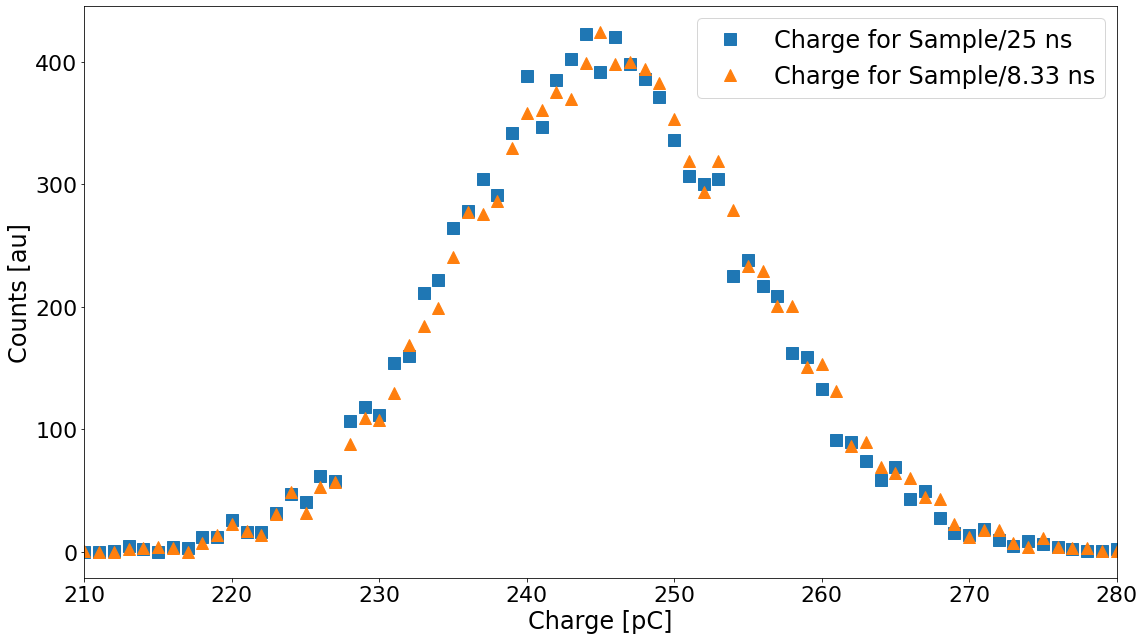

In [25]:
plt.figure(figsize=(16,9))

plt.plot(chhist25, 's', ms=12, label="Charge for Sample/25 ns")
plt.plot(chhist833, '^', ms=12, label="Charge for Sample/8.33 ns")

plt.legend(fontsize=24)
plt.ylabel("Counts [au]", fontsize=24)
plt.yticks(fontsize=22)
plt.xlabel("Charge [pC]", fontsize=24)
plt.xticks(fontsize=22)
plt.xlim(210,280)

plt.tight_layout()
plt.savefig("../plots/samplingChHistos.png", dpi=100)
plt.show()

In [53]:
print("Averages for 25 ns:")

averagePk25 = 0
tmpcnt = 0
for pk in range(pkhist25.size):
    if pkhist25[pk] > 0:
        averagePk25 += pk*pkhist25[pk]
        tmpcnt += pkhist25[pk]
        
averagePk25 /= tmpcnt
print("Peak:", averagePk25, "[mV]")


averageCh25 = 0
tmpcnt = 0
for ch in range(chhist25.size):
    if chhist25[ch] > 0:
        averageCh25 += ch*chhist25[ch]
        tmpcnt += chhist25[ch]
        
averageCh25 /= tmpcnt
print("Charge", averageCh25,"[pC]")
print("AoP:",  averageCh25/averagePk25, "[nF]")


print("\n")
print("Averages for 8.33 ns:")

averagePk833 = 0
tmpcnt = 0
for pk in range(pkhist833.size):
    if pkhist833[pk] > 0:
        averagePk833 += pk*pkhist833[pk]
        tmpcnt += pkhist25[pk]
        
averagePk833 /= tmpcnt
print("Peak:", averagePk833,"[mV]")

averageCh833 = 0
tmpcnt = 0
for ch in range(chhist833.size):
    if chhist833[ch] > 0:
        averageCh833 += ch*chhist833[ch]
        tmpcnt += chhist833[ch]
        
averageCh833 /= tmpcnt
print("Charge:", averageCh833,"[pC]")
print("AoP:", averageCh833/averagePk833, "[nF]" )


print("\n")
print("AoP ratio for 25 ns and 8.33 ns:")
print( (averageCh25/averagePk25) / (averageCh833/averagePk833) )

Averages for 25 ns:
Peak: 63.5958 [mV]
Charge 122.3581 [pC]
AoP: 1.9239965532315026 [nF]


Averages for 8.33 ns:
Peak: 69.45572969672298 [mV]
Charge: 122.6717 [pC]
AoP: 1.7661854613815657 [nF]


AoP ratio for 25 ns and 8.33 ns:
1.0893513706802298
